In [1]:
import random
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.nn.functional as F
import torch.backends.cudnn as cudnn
from torch.nn import init
import torch.optim as optim
import torch.utils.data
import torchvision
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
import matplotlib.pyplot as plt
import numpy as np
import time
import PIL
from PIL import Image

In [2]:
class Cfg:
    lr = 0.0002
    workers = 2
    batchSize = 4
    imageSize = 64
    n_epoch = 50
    beta1 = 0.5
    seed = 0
    cuda = True
    start_epo = 0
    pretrain = False
    nd_kpts = 6
cfg = Cfg()
device = torch.device("cuda:0" if cfg.cuda else "cpu")
print(device)
to_pil = torchvision.transforms.ToPILImage()

cuda:0


In [3]:
def load_data(n=450):
    X = []
    for i in range(n):
        try:
            img = Image.open(f"../dataset/ground_truth/gt_{i}.png")
        except:
            continue
        np_img = np.array(img)/255
        np_img = np.rollaxis(np_img, 2, 0)
        X.append(np_img)
    Y = np.load('../dataset/labels.npy')
    X = np.array(X)
    return X,Y

In [4]:
X,Y = load_data()
Xt,Yt = X[:425,:,:,:],Y[:425,:,:]
Xv,Yv = X[425:,:,:,:],Y[425:,:,:]
Xt,Yt,Xv,Yv = torch.Tensor(Xt),torch.Tensor(Yt),torch.Tensor(Xv),torch.Tensor(Yv)

In [5]:
X.shape

(450, 3, 256, 256)

In [6]:
Y.shape

(450, 256, 256)

In [7]:
print(Xv.shape)
print(Yv.shape)

torch.Size([25, 3, 256, 256])
torch.Size([25, 256, 256])


In [8]:
dataset = torch.utils.data.TensorDataset(Xt, Yt)
dataset_val = torch.utils.data.TensorDataset(Xv, Yv)

torch.Size([3, 256, 256])


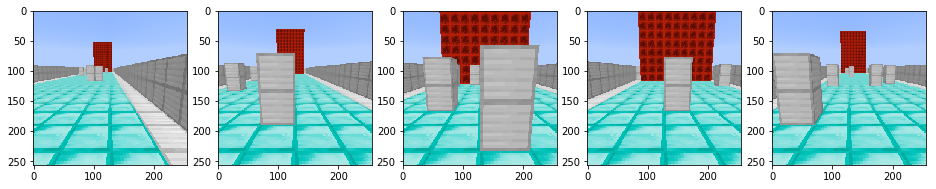

In [9]:
n_samples = 5
idx = np.random.choice(len(dataset), n_samples)
_, axarr = plt.subplots(1, n_samples, figsize=(16,4))
print(dataset[0][0].shape)
for i,j in enumerate(idx):
    img,label = dataset[j]
    temp = to_pil(img)
    axarr[i].imshow(temp)
plt.show()

torch.Size([256, 256])


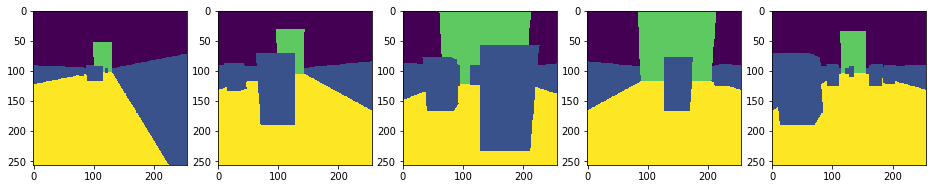

In [10]:
n_samples = 5
_, axarr = plt.subplots(1, n_samples, figsize=(16,4))
print(dataset[0][1].shape)
for i,j in enumerate(idx):
    img,label = dataset[j]
    #temp = to_pil(label)
    axarr[i].imshow(label, cmap='viridis',vmin=0, vmax=4)
plt.show()

In [11]:
from torchvision.models.segmentation import segmentation
net = segmentation.fcn_resnet50(num_classes=5).to(device)
print(net)
net.train()
if cfg.pretrain:
    pass

FCN(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequenti

)


In [12]:
optimizer = optim.Adam(net.parameters(), lr=cfg.lr)
criterion = nn.CrossEntropyLoss()
dataloader = torch.utils.data.DataLoader(dataset, batch_size=cfg.batchSize,
                                         shuffle=True, num_workers=int(cfg.workers),drop_last=True)
val_dataloader= torch.utils.data.DataLoader(dataset_val, batch_size=cfg.batchSize,
                                         shuffle=True, num_workers=int(cfg.workers),drop_last=True)
sample_number = len(dataset)
val_number = len(dataset_val)
val_acc_list = []
val_loss_list = []

Progress: 0
Progress: 45
Progress: 90


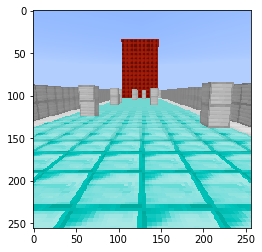

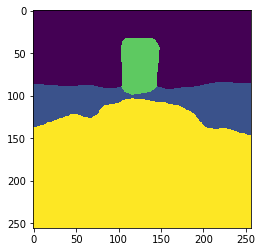

Epoch = 0 train_loss_avg = 0.034177223794600545 val_loss_avg = 0.009263613671064376 val acc = 0.8034610748291016
Progress: 0
Progress: 45
Progress: 90


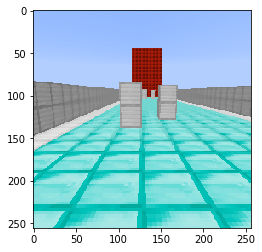

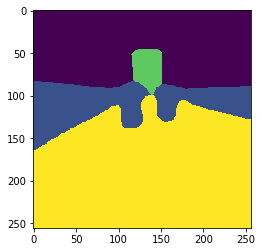

Epoch = 1 train_loss_avg = 0.007960321911994148 val_loss_avg = 0.005924212411046028 val acc = 0.8237133026123047
Progress: 0
Progress: 45
Progress: 90


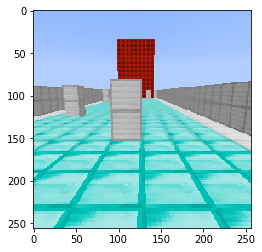

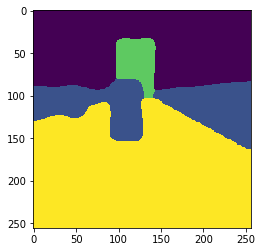

Epoch = 2 train_loss_avg = 0.0057493322364547675 val_loss_avg = 0.005047518238425255 val acc = 0.8080329895019531
Progress: 0
Progress: 45
Progress: 90


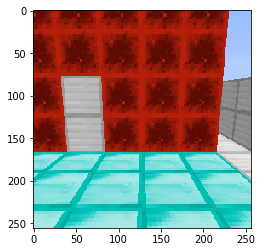

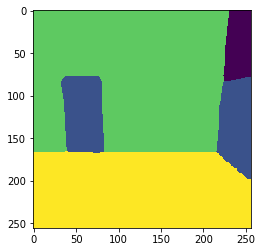

Epoch = 3 train_loss_avg = 0.004756725662771393 val_loss_avg = 0.004070904068648815 val acc = 0.728155771891276
Progress: 0
Progress: 45
Progress: 90


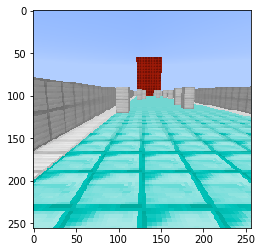

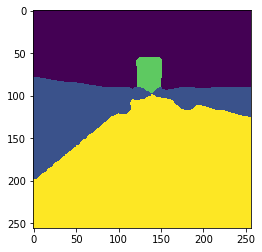

Epoch = 4 train_loss_avg = 0.003921621224897749 val_loss_avg = 0.0035310516878962516 val acc = 0.8090527852376302
Progress: 0
Progress: 45
Progress: 90


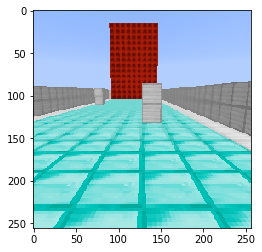

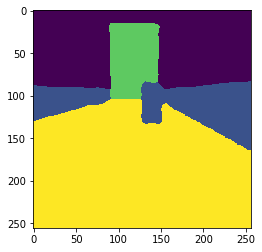

Epoch = 5 train_loss_avg = 0.003465442223583951 val_loss_avg = 0.0031777306273579596 val acc = 0.7884114583333334
Progress: 0
Progress: 45
Progress: 90


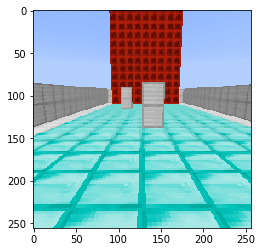

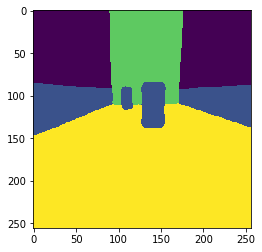

Epoch = 6 train_loss_avg = 0.00324050179518321 val_loss_avg = 0.002764413319528103 val acc = 0.7903188069661459
Progress: 0
Progress: 45
Progress: 90


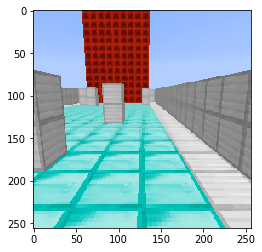

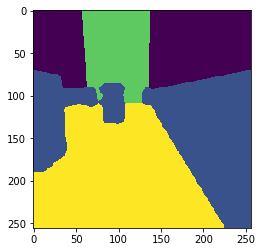

Epoch = 7 train_loss_avg = 0.0027941932386773474 val_loss_avg = 0.002512240745127201 val acc = 0.7977771759033203
Progress: 0
Progress: 45
Progress: 90


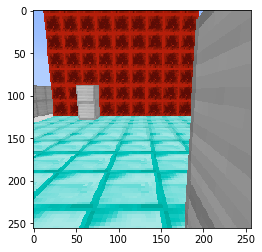

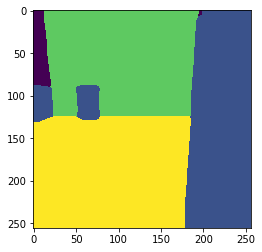

Epoch = 8 train_loss_avg = 0.0025732423726688414 val_loss_avg = 0.0023567645810544493 val acc = 0.7571601867675781
Progress: 0
Progress: 45
Progress: 90


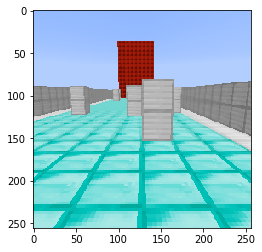

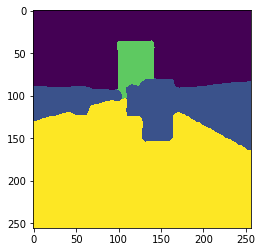

Epoch = 9 train_loss_avg = 0.002278069552472409 val_loss_avg = 0.002046442497521639 val acc = 0.8154137929280599
Progress: 0
Progress: 45
Progress: 90


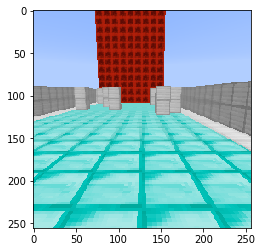

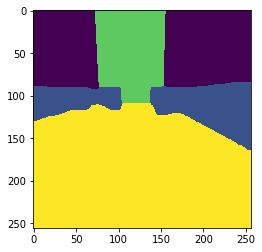

Epoch = 10 train_loss_avg = 0.0020740838568000233 val_loss_avg = 0.0020677991211414336 val acc = 0.7998708089192709
Progress: 0
Progress: 45
Progress: 90


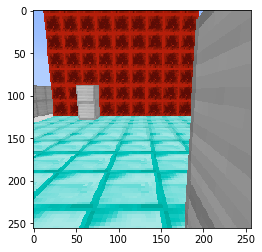

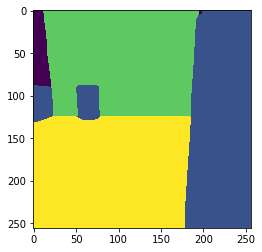

Epoch = 11 train_loss_avg = 0.002000241462579545 val_loss_avg = 0.0018884368427097798 val acc = 0.8359044392903646
Progress: 0
Progress: 45
Progress: 90


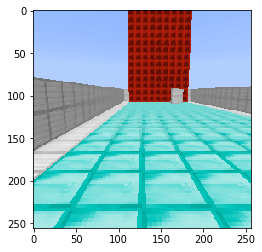

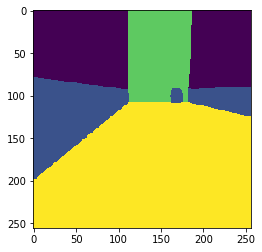

Epoch = 12 train_loss_avg = 0.0019038545548477593 val_loss_avg = 0.0019639059342443943 val acc = 0.7771326700846354
Progress: 0
Progress: 45
Progress: 90


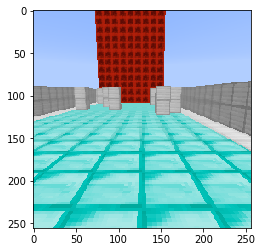

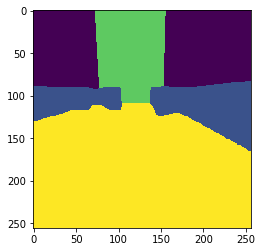

Epoch = 13 train_loss_avg = 0.0018747437942553968 val_loss_avg = 0.0020784070156514645 val acc = 0.8047466278076172
Progress: 0
Progress: 45
Progress: 90


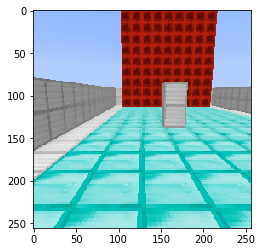

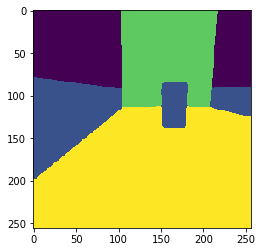

Epoch = 14 train_loss_avg = 0.001954022189054419 val_loss_avg = 0.0017636368237435819 val acc = 0.74310302734375
Progress: 0
Progress: 45
Progress: 90


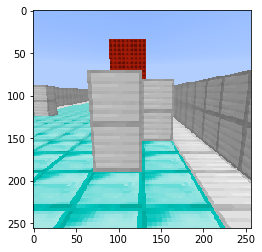

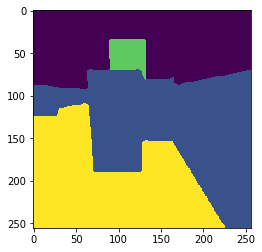

Epoch = 15 train_loss_avg = 0.0016608366885167711 val_loss_avg = 0.0016773774661123753 val acc = 0.7825794219970703
Progress: 0
Progress: 45
Progress: 90


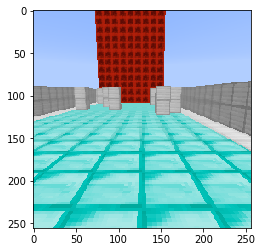

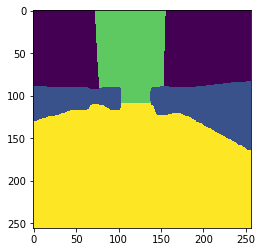

Epoch = 16 train_loss_avg = 0.0015617655332693283 val_loss_avg = 0.001696122456341982 val acc = 0.7990646362304688
Progress: 0
Progress: 45
Progress: 90


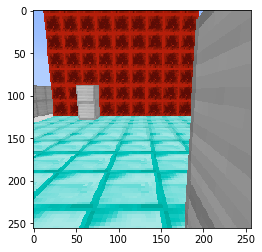

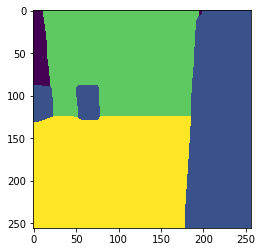

Epoch = 17 train_loss_avg = 0.0014867955594159224 val_loss_avg = 0.0014606155455112457 val acc = 0.7716687520345052
Progress: 0
Progress: 45
Progress: 90


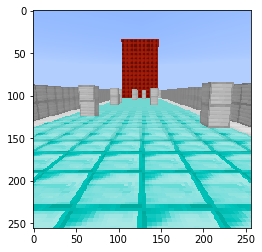

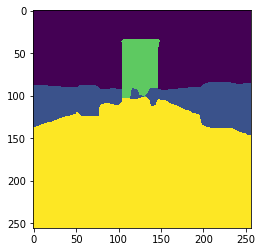

Epoch = 18 train_loss_avg = 0.0014420566872200545 val_loss_avg = 0.0015057959035038948 val acc = 0.8099918365478516
Progress: 0
Progress: 45
Progress: 90


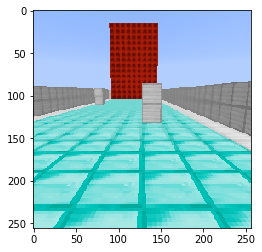

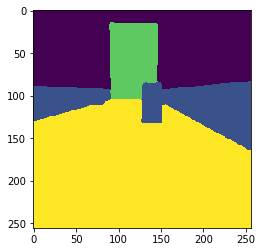

Epoch = 19 train_loss_avg = 0.001437835859353928 val_loss_avg = 0.0014206484705209731 val acc = 0.8143800099690756
Progress: 0
Progress: 45
Progress: 90


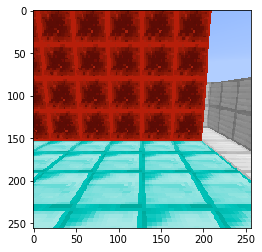

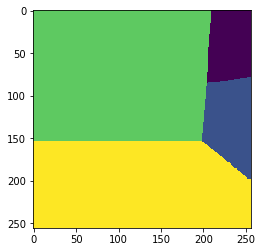

Epoch = 20 train_loss_avg = 0.001385014062089955 val_loss_avg = 0.0014354550279676915 val acc = 0.8550001780192057
Progress: 0
Progress: 45
Progress: 90


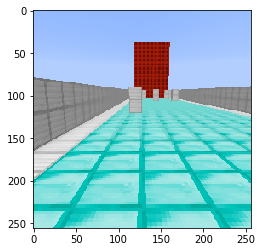

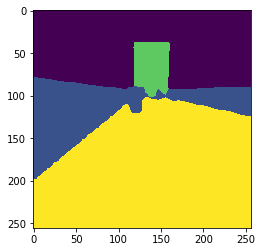

Epoch = 21 train_loss_avg = 0.0014226112640736734 val_loss_avg = 0.0015210476703941822 val acc = 0.8219146728515625
Progress: 0
Progress: 45
Progress: 90


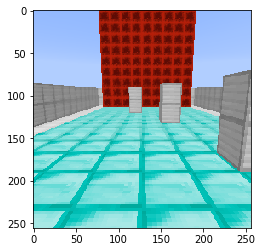

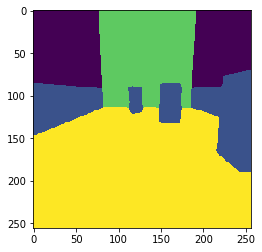

Epoch = 22 train_loss_avg = 0.001501439418095876 val_loss_avg = 0.0015155933611094951 val acc = 0.8195546468098959
Progress: 0
Progress: 45
Progress: 90


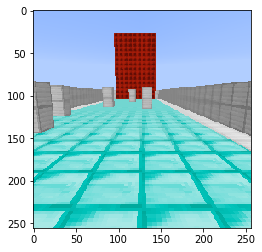

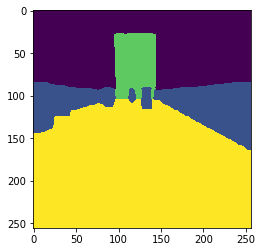

Epoch = 23 train_loss_avg = 0.0013502968891578562 val_loss_avg = 0.0014668406173586846 val acc = 0.7820657094319662
Progress: 0
Progress: 45
Progress: 90


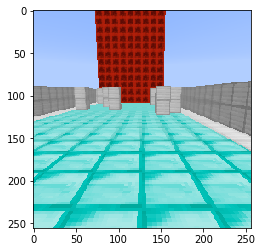

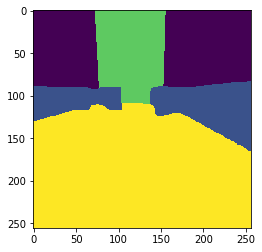

Epoch = 24 train_loss_avg = 0.0012940195400048704 val_loss_avg = 0.0015200449712574483 val acc = 0.7954591115315756
Progress: 0
Progress: 45
Progress: 90


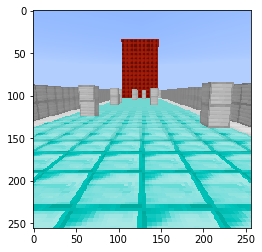

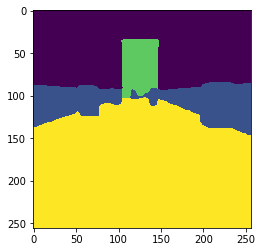

Epoch = 25 train_loss_avg = 0.0012998244489597923 val_loss_avg = 0.0013289333321154118 val acc = 0.7999006907145182
Progress: 0
Progress: 45
Progress: 90


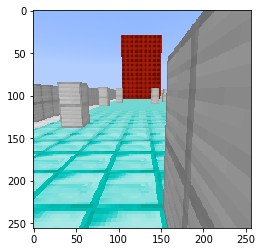

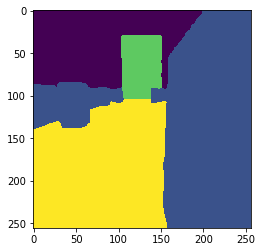

Epoch = 26 train_loss_avg = 0.0012114612571895124 val_loss_avg = 0.0011806395463645459 val acc = 0.7598005930582682
Progress: 0
Progress: 45
Progress: 90


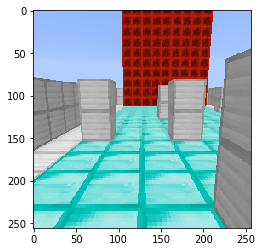

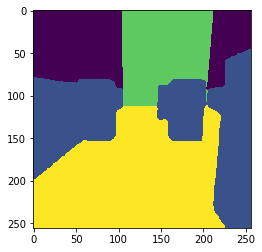

Epoch = 27 train_loss_avg = 0.0011471643413910094 val_loss_avg = 0.001196983363479376 val acc = 0.7670993804931641
Progress: 0
Progress: 45
Progress: 90


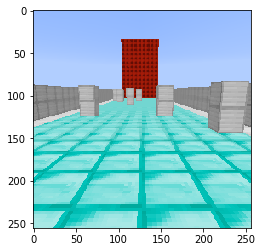

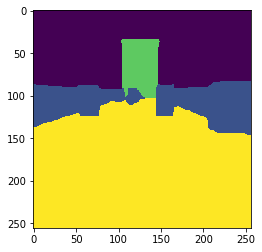

Epoch = 28 train_loss_avg = 0.001154695487142924 val_loss_avg = 0.0014150561764836311 val acc = 0.8046029408772787
Progress: 0
Progress: 45
Progress: 90


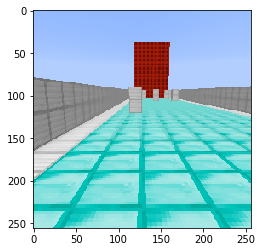

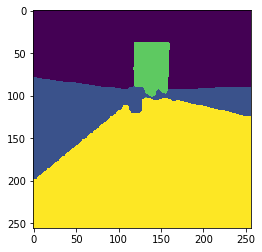

Epoch = 29 train_loss_avg = 0.001179763459983994 val_loss_avg = 0.0011899194307625294 val acc = 0.8148994445800781
Progress: 0
Progress: 45
Progress: 90


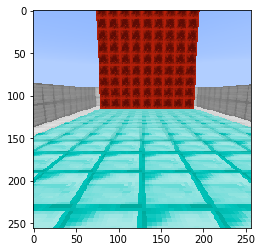

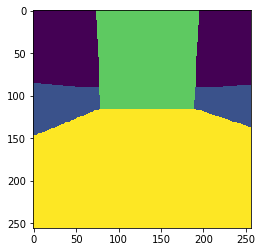

Epoch = 30 train_loss_avg = 0.0011428546998649835 val_loss_avg = 0.0012159833312034606 val acc = 0.8199246724446615
Progress: 0
Progress: 45
Progress: 90


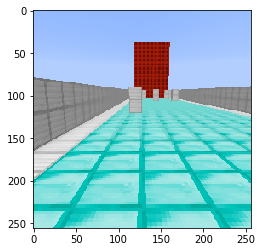

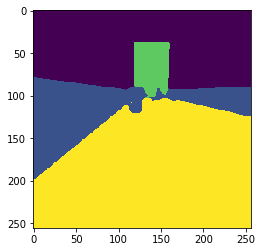

Epoch = 31 train_loss_avg = 0.0011454088498345193 val_loss_avg = 0.0012410816736519337 val acc = 0.8146940867106119
Progress: 0
Progress: 45
Progress: 90


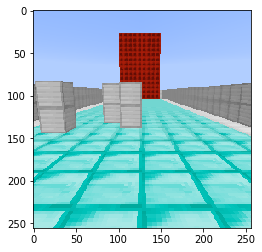

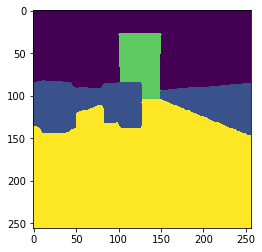

Epoch = 32 train_loss_avg = 0.0011278046278611702 val_loss_avg = 0.001284636165946722 val acc = 0.824859619140625
Progress: 0
Progress: 45
Progress: 90


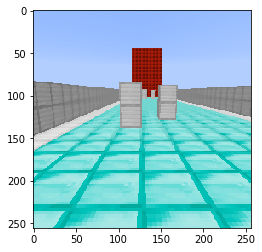

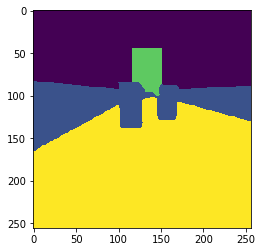

Epoch = 33 train_loss_avg = 0.00112985476906247 val_loss_avg = 0.0011752462573349476 val acc = 0.8325360616048177
Progress: 0
Progress: 45
Progress: 90


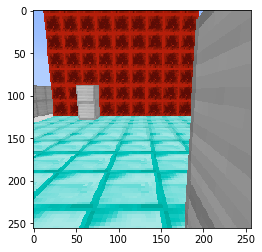

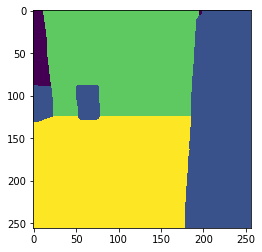

Epoch = 34 train_loss_avg = 0.0010835231029812026 val_loss_avg = 0.001128926845267415 val acc = 0.7774651845296224
Progress: 0
Progress: 45
Progress: 90


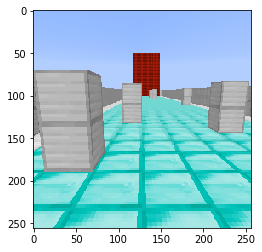

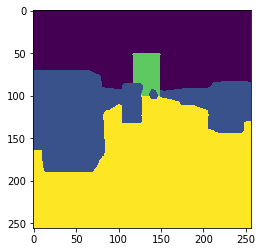

Epoch = 35 train_loss_avg = 0.0010797770595287574 val_loss_avg = 0.0011251814756542443 val acc = 0.7805595397949219
Progress: 0
Progress: 45
Progress: 90


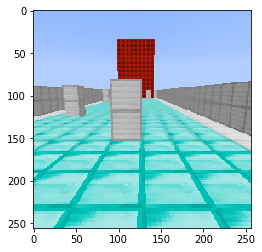

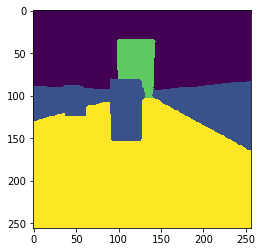

Epoch = 36 train_loss_avg = 0.0010862989931860391 val_loss_avg = 0.0011016260273754596 val acc = 0.8544432322184244
Progress: 0
Progress: 45
Progress: 90


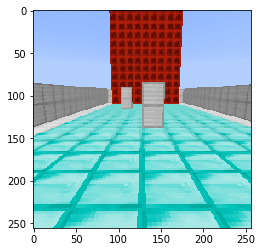

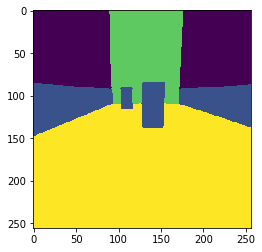

Epoch = 37 train_loss_avg = 0.0010733291216413765 val_loss_avg = 0.0012714209966361522 val acc = 0.7797514597574869
Progress: 0
Progress: 45
Progress: 90


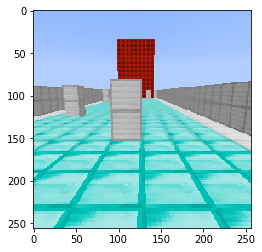

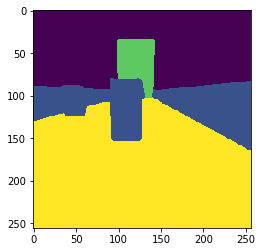

Epoch = 38 train_loss_avg = 0.001301824753446614 val_loss_avg = 0.0011147220991551876 val acc = 0.7969042460123698
Progress: 0
Progress: 45
Progress: 90


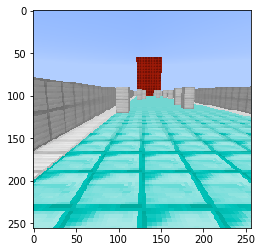

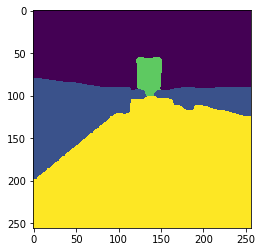

Epoch = 39 train_loss_avg = 0.0010644262979793199 val_loss_avg = 0.001137031288817525 val acc = 0.8193384806315104
Progress: 0
Progress: 45
Progress: 90


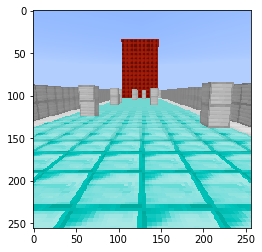

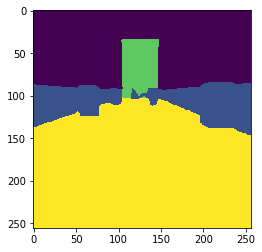

Epoch = 40 train_loss_avg = 0.000989261587314746 val_loss_avg = 0.0010741567984223366 val acc = 0.8347345987955729
Progress: 0
Progress: 45
Progress: 90


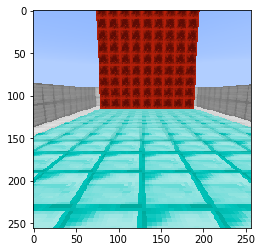

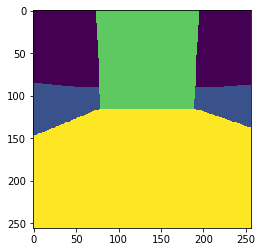

Epoch = 41 train_loss_avg = 0.000970244230428601 val_loss_avg = 0.0011182354018092156 val acc = 0.8203678131103516
Progress: 0
Progress: 45
Progress: 90


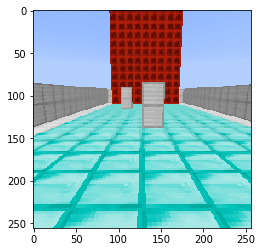

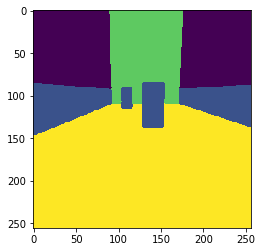

Epoch = 42 train_loss_avg = 0.0009678919799625873 val_loss_avg = 0.0009940095152705909 val acc = 0.8167521158854166
Progress: 0
Progress: 45
Progress: 90


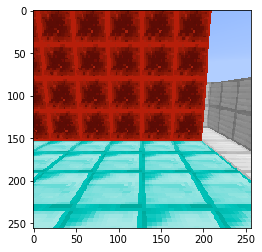

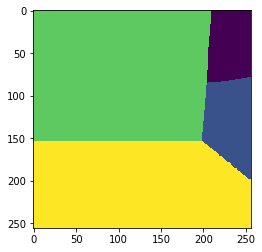

Epoch = 43 train_loss_avg = 0.0009426146184149034 val_loss_avg = 0.0010631674993783235 val acc = 0.8285128275553385
Progress: 0
Progress: 45
Progress: 90


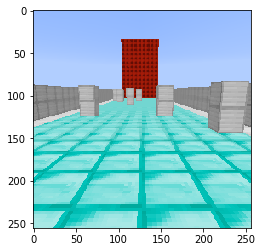

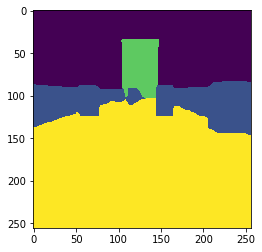

Epoch = 44 train_loss_avg = 0.0009302076417952776 val_loss_avg = 0.0010646118223667145 val acc = 0.8084424336751302
Progress: 0
Progress: 45
Progress: 90


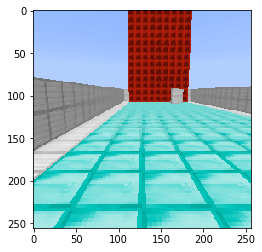

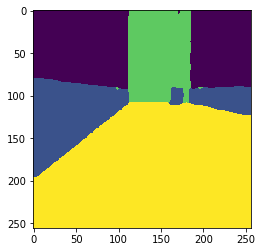

Epoch = 45 train_loss_avg = 0.005059499225360068 val_loss_avg = 0.07856487348675728 val acc = 0.8258616129557291
Progress: 0
Progress: 45
Progress: 90


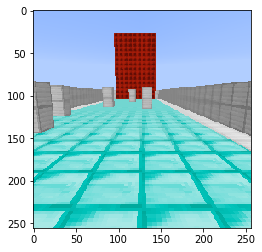

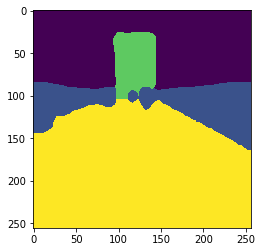

Epoch = 46 train_loss_avg = 0.02473897209062296 val_loss_avg = 0.004311463758349419 val acc = 0.821929931640625
Progress: 0
Progress: 45
Progress: 90


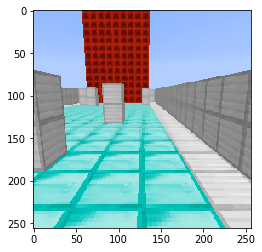

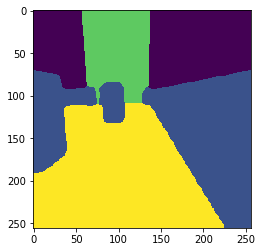

Epoch = 47 train_loss_avg = 0.004246134337256936 val_loss_avg = 0.0030533616989851 val acc = 0.8206526438395182
Progress: 0
Progress: 45
Progress: 90


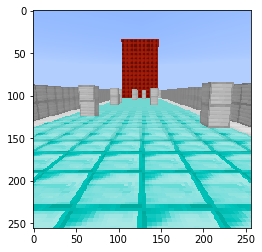

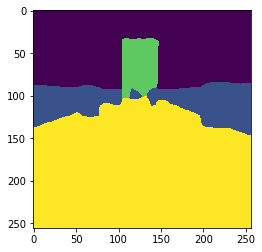

Epoch = 48 train_loss_avg = 0.0031999138435896703 val_loss_avg = 0.002594626247882843 val acc = 0.8091074625651041
Progress: 0
Progress: 45
Progress: 90


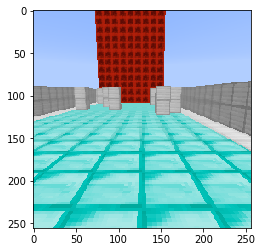

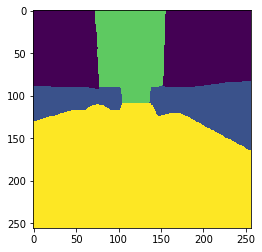

Epoch = 49 train_loss_avg = 0.0050710355983499215 val_loss_avg = 0.003221973851323128 val acc = 0.8672084808349609


In [13]:
for epoch in range(cfg.start_epo ,cfg.n_epoch):
    btime = time.time()
    train_loss = 0
    for i, data in enumerate(dataloader):
        net.zero_grad()
        images,labels = data
        images,labels  = images.to(device).float(),labels.to(device).long()
        outputs = net(images)['out']
        err = criterion(outputs, labels)
        err.backward()
        optimizer.step()
        train_loss += err.item()
        if i % 45 == 0:
            print("Progress:",i)
    train_loss_avg = train_loss/sample_number
    val_loss = 0
    acc = 0
    total = 0
    with torch.no_grad():
        val_loss = 0
        for i, data in enumerate(val_dataloader):
            net.zero_grad()
            images,labels = data
            images,labels  = images.to(device).float(),labels.to(device).long()
            outputs = net(images)['out']
            am = torch.argmax(outputs[0],dim=0) == labels
            acc += torch.sum(am) 
            total += labels.shape[2]**2 *4
            err = criterion(outputs, labels)
            val_loss += err.item()
    temp_img = images[0].cpu().numpy()
    temp_img = np.rollaxis(temp_img, 0, 3)
    plt.imshow(temp_img)
    plt.show()
    plt.imshow(torch.argmax(outputs[0],dim=0).cpu().numpy())
    plt.show()
    
    val_loss_avg = val_loss/val_number
    val_acc_list.append((acc.item()/total))
    val_loss_list.append(val_loss_avg)
    print("Epoch =",epoch,"train_loss_avg =",train_loss_avg,"val_loss_avg =",val_loss_avg,"val acc =",(acc.item()/total))


In [14]:
torch.argmax(outputs[0],dim=0).shape

torch.Size([256, 256])

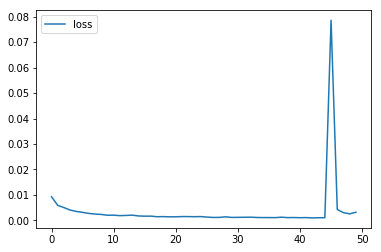

In [15]:
plt.plot(val_loss_list,label="loss")
plt.legend()
plt.savefig('loss.eps', format='eps')
plt.show()

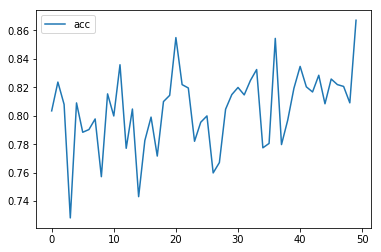

In [20]:
plt.plot(val_acc_list,label="acc")
plt.legend()
plt.savefig('acc.eps', format='eps')
plt.show()

In [17]:
val_acc_list

[0.8034610748291016,
 0.8237133026123047,
 0.8080329895019531,
 0.728155771891276,
 0.8090527852376302,
 0.7884114583333334,
 0.7903188069661459,
 0.7977771759033203,
 0.7571601867675781,
 0.8154137929280599,
 0.7998708089192709,
 0.8359044392903646,
 0.7771326700846354,
 0.8047466278076172,
 0.74310302734375,
 0.7825794219970703,
 0.7990646362304688,
 0.7716687520345052,
 0.8099918365478516,
 0.8143800099690756,
 0.8550001780192057,
 0.8219146728515625,
 0.8195546468098959,
 0.7820657094319662,
 0.7954591115315756,
 0.7999006907145182,
 0.7598005930582682,
 0.7670993804931641,
 0.8046029408772787,
 0.8148994445800781,
 0.8199246724446615,
 0.8146940867106119,
 0.824859619140625,
 0.8325360616048177,
 0.7774651845296224,
 0.7805595397949219,
 0.8544432322184244,
 0.7797514597574869,
 0.7969042460123698,
 0.8193384806315104,
 0.8347345987955729,
 0.8203678131103516,
 0.8167521158854166,
 0.8285128275553385,
 0.8084424336751302,
 0.8258616129557291,
 0.821929931640625,
 0.820652643839518